# Numba Acceleration

New in pandas 1.0, you can JIT compile your user-defined functions for `rolling().apply` using `numba`.

In [1]:
import numpy as np
import pandas as pd

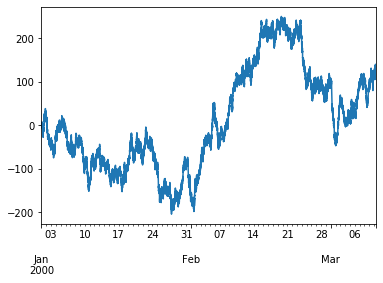

In [2]:
df = pd.DataFrame({"A": np.random.randn(100_000)},
                  index=pd.date_range('1/1/2000', periods=100_000,
                                      freq='T')
).cumsum()
df.A.plot();

In [3]:
def mad(x):
    return np.fabs(x - x.mean()).mean()

```python
# Not running this, it takes 50-60s
>>> %time _ = df.rolling(10).apply(mad)
CPU times: user 52.4 s, sys: 661 ms, total: 53.1 s
Wall time: 52.8 s
```

In [4]:
%time _ = df.rolling(10).apply(mad, engine="numba", raw=True)

CPU times: user 3.69 s, sys: 744 ms, total: 4.44 s
Wall time: 5.97 s


In [5]:
%timeit _ = df.rolling(10).apply(mad, engine="numba", raw=True)

110 ms ± 20.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Yes, a ~1000x speedup.

In pandas 1.1 this is expanding to other places like `groupby`.